In [2]:
!pip install d2l
!pip install dgl
!pip install apache_beam== mwparserfromhell
!pip install datasets
!pip install nltk
!pip install gensim
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 209.8 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 558.0 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 143.1 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 522.8 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 490.0 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 514.5 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 501.2 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 468.0 kB/s eta 0:00:00 kB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 531.5 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 326.8 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━

In [4]:
!conda env update -f environment.yml

Solving environment: failed

ResolvePackageNotFound: 
  - dgl
  - apache_beam==mwparserfromhell
  - node2vec
  - pickle
  - itertools
  - d2l
  - torch



In [5]:
!pip install itertools
!pip install torch
!pip install apache_beam==mwparserfromhell

ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 441.6 kB/s eta 0:00:00m eta 0:00:010:00:40
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 464.5 kB/s eta 0:00:00m eta 0:00:010:00:22
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 486.0 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 495.0 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 578.7 kB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 321.8 kB/s eta 0:00:00m eta 0:00:010:00:58
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 358.4 kB/s eta 0:00:00m eta 0:00:010:00:10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 409.5 kB/s eta 0:00:00m eta 0:00:010:00:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2

In [6]:
!pip install matplotlib networkx scipy tqdm datasets

[nltk_data] Downloading package punkt to /home/yannick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


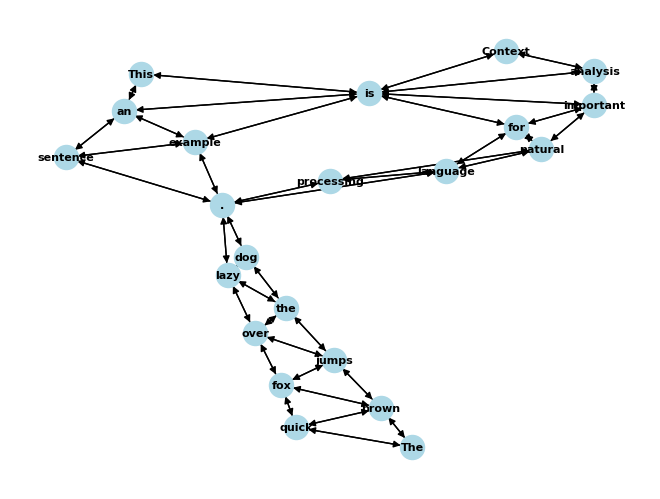

In [7]:
""" Construct a small graph with word and context"""

import nltk
nltk.download('punkt')
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

# Sample sentences
sentences = [
    "This is an example sentence.",
    "Context analysis is important for natural language processing.",
    "The quick brown fox jumps over the lazy dog."
]

# Tokenize sentences into words
tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]

# Define the context window size (number of surrounding words)
context_window_size = 2

# Create a directed graph using NetworkX
graph = nx.DiGraph()

# Iterate through each tokenized sentence
for sentence_tokens in tokenized_sentences:
    # Iterate through each word in the sentence
    for i, word in enumerate(sentence_tokens):
        # Define the start and end indices of the context window
        start_index = max(0, i - context_window_size)
        end_index = min(len(sentence_tokens), i + context_window_size + 1)

        # Extract the context words within the window
        context_words = sentence_tokens[start_index:i] + sentence_tokens[i+1:end_index]

        # Add edges to the graph based on the context
        for context_word in context_words:
            graph.add_edge(word, context_word)

# Draw the graph
pos = nx.spring_layout(graph)  # Positions for all nodes
nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='lightblue', font_size=8)
plt.show()



In [10]:
!pip install torch
!pip install PIL
!pip install torchvision

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 495.5 kB/s eta 0:00:00m eta 0:00:010:00:01


In [13]:
from d2l import torch as d2l
import pickle
import os
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
d2l.DATA_HUB['ptb'] = (d2l.DATA_URL + 'ptb.zip',
                       '319d85e578af0cdc590547f26231e4e31cdf1e42')
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into a cleaned text string
    cleaned_text = ' '.join(tokens)

    return cleaned_text




def read_ptb():
    """Load the PTB dataset into a list of text lines."""
    data_dir = d2l.download_extract('ptb')
    # Read the training set
    with open(os.path.join(data_dir, 'ptb.train.txt')) as f:
        raw_text = f.read()
        sentences = [clean_text(line) for line in raw_text.split('\n')]
        return [word_tokenize(sentence) for sentence in sentences]

def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

def save_pickle(data, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(data, f)


[nltk_data] Downloading package punkt to /home/yannick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/yannick/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/yannick/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/yannick/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
from datasets import load_dataset

data = load_dataset("wikipedia", "20220301.simple")

/home/yannick/anaconda3/envs/gnn/lib/python3.8/site-packages/datasets/load.py:1461: FutureWarning: The repository for wikipedia contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/wikipedia
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/235M [00:00<?, ?B/s]

In [19]:
save_pickle(data= data, file_path=os.path.join(input_folder,'wiki235.pkl'))

In [2]:
input_folder = ''

In [3]:
dataset = load_pickle(file_path=os.path.join(input_folder,'wiki235.pkl'))

In [4]:
dataset= dataset['train']['text'][:3000]

Word2vec

In [ ]:
sentences = read_ptb()
f'# sentences: {len(sentences)}'

In [ ]:
with open(os.path.join(input_folder, 'shaespear.txt')) as f:
        raw_text = f.read()
        sentences = [clean_text(line) for line in raw_text.split('\n')]
        sentences = [word_tokenize(sentence) for sentence in sentences]


In [ ]:
dataset[20]

In [5]:
sentences = []
for raw_text in dataset:
    sentences.extend([clean_text(line) for line in raw_text.split('\n\n')])
print(sentences[0])
sentences = [word_tokenize(sentence) for sentence in sentences]

april fourth month year julian gregorian calendar come march may one four month day


In [6]:
save_pickle(data= sentences, file_path=os.path.join(input_folder,'sentences.pkl'))

In [7]:
sentences = load_pickle(file_path=os.path.join(input_folder,'sentences.pkl'))

In [8]:
len(sentences)

37351

In [6]:
f'# sentences: {len(sentences)}'

'# sentences: 1'

In [9]:
from gensim.models import Word2Vec
# train model
# sentences = [word_tokenize(sentence) for sentence in sentences]
w2v_model = Word2Vec(sentences, min_count=3, vector_size=50, window=7)
# summarize the loaded model
print(w2v_model)
# summarize vocabulary
words = list(w2v_model.wv.key_to_index.keys())
words = [word for word in words if word != 'unilab']
# print(words)
# access vector for one word
# print(model['sentence'])
# save model
# model.save('model.bin')
# # load model
# new_model = Word2Vec.load('model.bin')
# print(new_model)

Word2Vec<vocab=24820, vector_size=50, alpha=0.025>


In [10]:
import pickle
word_to_vec={}

for word in words:
     if word != 'unilab':
        word_to_vec[word] = w2v_model.wv.get_vector(word)


save_pickle(data= word_to_vec, file_path=os.path.join(input_folder,'word2vec.pkl'))
save_pickle(data= words, file_path=os.path.join(input_folder,'vocabulary.pkl'))
print('dictionary saved successfully to file')

dictionary saved successfully to file


GNN Word2Vec

In [27]:
%matplotlib inline

In [11]:
import dgl
import torch
import networkx as nx
import numpy as np
import tqdm
import pickle


class WordContextDataset(dgl.data.DGLDataset):
    def __init__(self, sentences,  vocab, context_window_size=2):
        super(WordContextDataset, self).__init__(name='word_context')
        self.sentences = sentences
        self.context_window_size = context_window_size
        self.vocabulary = vocab
        self._prepare()

    def _prepare(self):
        # Create a directed graph using NetworkX
        graph = nx.DiGraph()

        # Create word-to-ID and ID-to-word mappings
        word_to_id = {}
        id_to_word = {}

        # Function to add a word to the mappings
        def add_word(word):
            if word not in word_to_id:
                new_id = len(word_to_id)
                word_to_id[word] = new_id
                id_to_word[new_id] = word

        # Iterate through each tokenized sentence
        # tokenized_sentences = [word_tokenize(sentence) for sentence in self.sentences]
        for sentence_tokens in tqdm.tqdm(self.sentences):
            # Iterate through each word in the sentence
            for i, word in enumerate(sentence_tokens):
                if word in self.vocabulary:
                # Add the central word to the mappings
                  add_word(word)

                  # Define the start and end indices of the context window
                  start_index = max(0, i - self.context_window_size)
                  end_index = min(len(sentence_tokens), i + self.context_window_size + 1)

                  # Extract the context words within the window
                  context_words = sentence_tokens[start_index:i] + sentence_tokens[i+1:end_index]

                  # Add edges to the graph based on the context
                  for context_word in context_words:
                    if context_word in self.vocabulary:
                      add_word(context_word)
                      graph.add_edge(word_to_id[word], word_to_id[context_word])

        # Convert the NetworkX graph to a DGL graph
        self.graph = dgl.DGLGraph(graph)

        # Store word-to-ID and ID-to-word mappings as attributes of the dataset
        self.word_to_id = word_to_id
        self.id_to_word = id_to_word
        # assert len(self.id_to_word) != len(self.vocabulary), "gnn vec and w2v vocabalary cannot have the same size"
        # Create one-hot encoding for each word and store in 'feat' attribute
        #self.graph.ndata['feat'] = torch.eye(len(self.word_to_id)-1)
        # self.graph.ndata['feat'] = torch.eye(39085)

    def __getitem__(self, idx):
        return self.graph

    def __len__(self):
        return 1  # This dataset consists of a single graph

# Sample sentences

# Create the WordContextDataset
words = load_pickle(file_path=os.path.join(input_folder,'vocabulary.pkl'))
dataset = WordContextDataset(sentences,words, context_window_size=7)

# Print word-to-ID mapping
print("Word-to-ID Mapping:")
# for word, word_id in dataset.word_to_id.items():
#     print(f"{word}: {word_id}")

# Print ID-to-word mapping
print("\nID-to-Word Mapping:")

# for word_id, word in dataset.id_to_word.items():
#     print(f"{word_id}: {word}")

# # Visualize the graph using NetworkX
# nx_graph = dataset.graph.to_networkx()
# pos = nx.spring_layout(nx_graph)
# nx.draw(nx_graph, pos, with_labels=True, font_size=8, node_color='lightblue', font_weight='bold', arrowsize=10)
# plt.show()


100%|█████████████████████████████████████| 37351/37351 [12:35<00:00, 49.41it/s]
/home/yannick/anaconda3/envs/gnn/lib/python3.8/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


Word-to-ID Mapping:

ID-to-Word Mapping:


In [12]:
dataset.graph.ndata['feat'] = torch.eye(len(dataset.word_to_id))

In [ ]:
'unilab' in words

In [ ]:
len(dataset.word_to_id.keys())

In [ ]:
list1 = set(words)
list2 = set(dataset.word_to_id.keys())

# Find elements that are in list1 but not in list2
difference1 = [item for item in list1 if item not in list2]

# Find elements that are in list2 but not in list1
difference2 = [item for item in list2 if item not in list1]

# Combine both differences
all_differences = difference1 + difference2

print("Elements in list1 but not in list2:", difference1)
print("Elements in list2 but not in list1:", difference2)
print("All differences:", all_differences)


In [13]:
from dgl.data.utils import save_graphs
import torch
graph_labels = {"glabel": torch.tensor([0])}
save_graphs(os.path.join(input_folder,"origin_word_graph_data.bin"),[dataset[0]] , graph_labels)

save_pickle(data=dataset.id_to_word , file_path=os.path.join(input_folder,'id_to_word.pkl'))
save_pickle(data=dataset.word_to_id , file_path=os.path.join(input_folder,'word_to_id.pkl'))




Link Prediction using Graph Neural Networks
===========================================

In the :doc:`introduction <1_introduction>`, you have already learned
the basic workflow of using GNNs for node classification,
i.e. predicting the category of a node in a graph. This tutorial will
teach you how to train a GNN for link prediction, i.e. predicting the
existence of an edge between two arbitrary nodes in a graph.

By the end of this tutorial you will be able to

-  Build a GNN-based link prediction model.
-  Train and evaluate the model on a small DGL-provided dataset.

(Time estimate: 28 minutes)


In [1]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
import itertools
import numpy as np
import scipy.sparse as sp
import os

Overview of Link Prediction with GNN
------------------------------------

Many applications such as social recommendation, item recommendation,
knowledge graph completion, etc., can be formulated as link prediction,
which predicts whether an edge exists between two particular nodes. This
tutorial shows an example of predicting whether a citation relationship,
either citing or being cited, between two papers exists in a citation
network.

This tutorial formulates the link prediction problem as a binary classification
problem as follows:

-  Treat the edges in the graph as *positive examples*.
-  Sample a number of non-existent edges (i.e. node pairs with no edges
   between them) as *negative* examples.
-  Divide the positive examples and negative examples into a training
   set and a test set.
-  Evaluate the model with any binary classification metric such as Area
   Under Curve (AUC).

<div class="alert alert-info"><h4>Note</h4><p>The practice comes from
   `SEAL <https://papers.nips.cc/paper/2018/file/53f0d7c537d99b3824f0f99d62ea2428-Paper.pdf>`__,
   although the model here does not use their idea of node labeling.</p></div>

In some domains such as large-scale recommender systems or information
retrieval, you may favor metrics that emphasize good performance of
top-K predictions. In these cases you may want to consider other metrics
such as mean average precision, and use other negative sampling methods,
which are beyond the scope of this tutorial.

Loading graph and features
--------------------------

Following the :doc:`introduction <1_introduction>`, this tutorial
first loads the Cora dataset.




In [2]:
import dgl.data
from dgl.data.utils import load_graphs
import os
import numpy as np
input_folder = ''

glist, label_dict = load_graphs(os.path.join(input_folder,"origin_word_graph_data.bin"))
g = glist[0]

Prepare training and testing sets
---------------------------------

This tutorial randomly picks 10% of the edges for positive examples in
the test set, and leave the rest for the training set. It then samples
the same number of edges for negative examples in both sets.




In [3]:
# Split edge set for training and testing
u, v = g.edges()

eids = np.arange(g.number_of_edges())
eids = np.random.permutation(eids)
test_size = int(len(eids) * 0)
train_size = g.number_of_edges() - test_size
# test_pos_u, test_pos_v = u[eids[:test_size]], v[eids[:test_size]]
train_pos_u, train_pos_v = u[eids[test_size:]], v[eids[test_size:]]

# Find all negative edges and split them for training and testing
adj = sp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
adj_neg = 1 - adj.todense() - np.eye(g.number_of_nodes())
neg_u, neg_v = np.where(adj_neg != 0)

neg_eids = np.random.choice(len(neg_u), g.number_of_edges())
#test_neg_u, test_neg_v = neg_u[neg_eids[:test_size]], neg_v[neg_eids[:test_size]]
train_neg_u, train_neg_v = neg_u[neg_eids[test_size:]], neg_v[neg_eids[test_size:]]

When training, you will need to remove the edges in the test set from
the original graph. You can do this via ``dgl.remove_edges``.

<div class="alert alert-info"><h4>Note</h4><p>``dgl.remove_edges`` works by creating a subgraph from the
   original graph, resulting in a copy and therefore could be slow for
   large graphs. If so, you could save the training and test graph to
   disk, as you would do for preprocessing.</p></div>




In [4]:
train_g = dgl.remove_edges(g, eids[:test_size])

Define a GraphSAGE model
------------------------

This tutorial builds a model consisting of two
`GraphSAGE <https://arxiv.org/abs/1706.02216>`__ layers, each computes
new node representations by averaging neighbor information. DGL provides
``dgl.nn.SAGEConv`` that conveniently creates a GraphSAGE layer.




In [5]:
from dgl.nn import SAGEConv

# ----------- 2. create model -------------- #
# build a two-layer GraphSAGE model
class GraphSAGE(nn.Module):
    def __init__(self, in_feats, h_feats):
        super(GraphSAGE, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, 'mean')
        self.conv2 = SAGEConv(h_feats, h_feats, 'mean')
        self.conv3 = SAGEConv(h_feats, h_feats, 'mean')

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        h = F.relu(h)
        h = self.conv3(g, h)
        return h

The model then predicts the probability of existence of an edge by
computing a score between the representations of both incident nodes
with a function (e.g. an MLP or a dot product), which you will see in
the next section.

\begin{align}\hat{y}_{u\sim v} = f(h_u, h_v)\end{align}




Positive graph, negative graph, and ``apply_edges``
---------------------------------------------------

In previous tutorials you have learned how to compute node
representations with a GNN. However, link prediction requires you to
compute representation of *pairs of nodes*.

DGL recommends you to treat the pairs of nodes as another graph, since
you can describe a pair of nodes with an edge. In link prediction, you
will have a *positive graph* consisting of all the positive examples as
edges, and a *negative graph* consisting of all the negative examples.
The *positive graph* and the *negative graph* will contain the same set
of nodes as the original graph.  This makes it easier to pass node
features among multiple graphs for computation.  As you will see later,
you can directly feed the node representations computed on the entire
graph to the positive and the negative graphs for computing pair-wise
scores.

The following code constructs the positive graph and the negative graph
for the training set and the test set respectively.




In [10]:
train_pos_g = dgl.graph((train_pos_u, train_pos_v), num_nodes=g.number_of_nodes())
train_neg_g = dgl.graph((train_neg_u, train_neg_v), num_nodes=g.number_of_nodes())

# test_pos_g = dgl.graph((test_pos_u, test_pos_v), num_nodes=g.number_of_nodes())
# test_neg_g = dgl.graph((test_neg_u, test_neg_v), num_nodes=g.number_of_nodes())

In [45]:
# test_pos_g.nodes()

The benefit of treating the pairs of nodes as a graph is that you can
use the ``DGLGraph.apply_edges`` method, which conveniently computes new
edge features based on the incident nodes’ features and the original
edge features (if applicable).

DGL provides a set of optimized builtin functions to compute new
edge features based on the original node/edge features. For example,
``dgl.function.u_dot_v`` computes a dot product of the incident nodes’
representations for each edge.




In [6]:
import dgl.function as fn

class DotPredictor(nn.Module):
    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            # Compute a new edge feature named 'score' by a dot-product between the
            # source node feature 'h' and destination node feature 'h'.
            g.apply_edges(fn.u_dot_v('h', 'h', 'score'))
            # u_dot_v returns a 1-element vector for each edge so you need to squeeze it.
            return g.edata['score'][:, 0]

You can also write your own function if it is complex.
For instance, the following module produces a scalar score on each edge
by concatenating the incident nodes’ features and passing it to an MLP.




In [7]:
class MLPPredictor(nn.Module):
    def __init__(self, h_feats):
        super().__init__()
        self.W1 = nn.Linear(h_feats * 2, h_feats)
        self.W2 = nn.Linear(h_feats, 1)

    def apply_edges(self, edges):
        """
        Computes a scalar score for each edge of the given graph.

        Parameters
        ----------
        edges :
            Has three members ``src``, ``dst`` and ``data``, each of
            which is a dictionary representing the features of the
            source nodes, the destination nodes, and the edges
            themselves.

        Returns
        -------
        dict
            A dictionary of new edge features.
        """
        h = torch.cat([edges.src['h'], edges.dst['h']], 1)
        return {'score': self.W2(F.relu(self.W1(h))).squeeze(1)}

    def forward(self, g, h):
        with g.local_scope():
            g.ndata['h'] = h
            g.apply_edges(self.apply_edges)
            return g.edata['score']

<div class="alert alert-info"><h4>Note</h4><p>The builtin functions are optimized for both speed and memory.
   We recommend using builtin functions whenever possible.</p></div>

<div class="alert alert-info"><h4>Note</h4><p>If you have read the :doc:`message passing
   tutorial <3_message_passing>`, you will notice that the
   argument ``apply_edges`` takes has exactly the same form as a message
   function in ``update_all``.</p></div>




Training loop
-------------

After you defined the node representation computation and the edge score
computation, you can go ahead and define the overall model, loss
function, and evaluation metric.

The loss function is simply binary cross entropy loss.

\begin{align}\mathcal{L} = -\sum_{u\sim v\in \mathcal{D}}\left( y_{u\sim v}\log(\hat{y}_{u\sim v}) + (1-y_{u\sim v})\log(1-\hat{y}_{u\sim v})) \right)\end{align}

The evaluation metric in this tutorial is AUC.




In [8]:
model = GraphSAGE(train_g.ndata['feat'].shape[1], 50)
# You can replace DotPredictor with MLPPredictor.
pred = MLPPredictor(50)
# pred = DotPredictor()

def compute_loss(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score])
    labels = torch.cat([torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])])
    return F.binary_cross_entropy_with_logits(scores, labels)

def compute_auc(pos_score, neg_score):
    scores = torch.cat([pos_score, neg_score]).numpy()
    labels = torch.cat(
        [torch.ones(pos_score.shape[0]), torch.zeros(neg_score.shape[0])]).numpy()
    return roc_auc_score(labels, scores)

The training loop goes as follows:

<div class="alert alert-info"><h4>Note</h4><p>This tutorial does not include evaluation on a validation
   set. In practice you should save and evaluate the best model based on
   performance on the validation set.</p></div>




In [11]:
# ----------- 3. set up loss and optimizer -------------- #
# in this case, loss will in training loop
optimizer = torch.optim.Adam(itertools.chain(model.parameters(), pred.parameters()), lr=0.01)

# ----------- 4. training -------------------------------- #
all_logits = []
for e in range(50):
    # forward
    h = model(train_g, train_g.ndata['feat'])
    pos_score = pred(train_pos_g, h)
    neg_score = pred(train_neg_g, h)
    loss = compute_loss(pos_score, neg_score)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if e % 5 == 0:
        print('In epoch {}, loss: {}'.format(e, loss))

# ----------- 5. check results ------------------------ #
from sklearn.metrics import roc_auc_score
with torch.no_grad():
    pos_score = pred(train_pos_g, h)
    neg_score = pred(train_neg_g, h)
    print('AUC', compute_auc(pos_score, neg_score))


# Thumbnail credits: Link Prediction with Neo4j, Mark Needham
# sphinx_gallery_thumbnail_path = '_static/blitz_4_link_predict.png'

In epoch 0, loss: 0.6931415796279907
In epoch 5, loss: 0.5847985744476318
In epoch 10, loss: 0.458812415599823
In epoch 15, loss: 0.35044413805007935
In epoch 20, loss: 0.33868303894996643
In epoch 25, loss: 0.3187541961669922
In epoch 30, loss: 0.32564058899879456
In epoch 35, loss: 0.3182368576526642
In epoch 40, loss: 0.31720060110092163
In epoch 45, loss: 0.317082941532135
AUC 0.9386569799130372


In [14]:
import pickle
word_to_vec={}
node_features = h.detach().numpy()

id_to_word = load_pickle(file_path=os.path.join(input_folder,'id_to_word.pkl'))

for i in train_g.nodes().numpy():
     word_to_vec[id_to_word[i]] = node_features[i]



save_pickle(data=word_to_vec , file_path=os.path.join(input_folder,'word2vec_gnn.pkl'))


Node2vec

In [51]:
import dgl.data
from dgl.data.utils import load_graphs
input_folder = ''

glist, label_dict = load_graphs(os.path.join(input_folder,"origin_word_graph_data.bin"))
g = glist[0]
nx_graph = g.to_networkx()

In [55]:
import networkx as nx
from gensim.models import Word2Vec
from node2vec import Node2Vec  # You may need to install the 'node2vec' library

# Example: Creating a Dynamic Linked Graph (DLG)
# Assume three snapshots of the graph at different time points


# Step 1: Generate Random Walks for Each Snapshot
random_walks = []
node2vec = Node2Vec(nx_graph, dimensions=50, walk_length=30, num_walks=200, workers=4)
walks = node2vec.walks
random_walks.extend(walks)

# Step 2: Train Word2Vec Model
model = Word2Vec(random_walks, size=50, window=7, min_count=1, sg=1, workers=4)

# Now, you can access node embeddings using model.wv
# For example, get the embedding for node 1 in the first snapshot


# Optionally, you can save the model for later use
model.save("node2vec_model_dlgr")

# Evaluate the embeddings on specific tasks or metrics as needed
# ...

# Note: This is a simplified example, and you may need to adjust parameters and preprocessing steps based on your specific DLG characteristics.


ContextualVersionConflict: (scipy 1.6.2 (/home/yannick/anaconda3/envs/gnn/lib/python3.8/site-packages), Requirement.parse('scipy>=1.7.0'), {'gensim'})

In [ ]:
import pickle
word_to_vec={}
node_features = h.detach().numpy()

id_to_word = load_pickle(file_path=os.path.join(input_folder,'id_to_word.pkl'))

for i in g.nodes().numpy():
     word_to_vec[id_to_word[i]] = w2v_model.wv.get_vector(str(i))



save_pickle(data=word_to_vec , file_path=os.path.join(input_folder,'node2vec.pkl'))

Build similarity graph

In [ ]:
import pickle
import random


from itertools import combinations




def generate_disjoint_subsets(input_list, subsize, nb_max=10):
    subsets = []

    for subset_indices in combinations(range(len(input_list)), subsize):
        if len(subsets)>=nb_max:
          break
        subset = [input_list[j] for j in subset_indices]

        # # Check if the intersection with existing subsets is empty
        # if all(set(subset).isdisjoint(existing_subset) for existing_subset in subsets):
        subsets.append(subset)

    return subsets


def extract_common_subset(embeddings1, embeddings2, selected_words):


    subset_embeddings1 = {word: embeddings1[word] for word in selected_words}
    subset_embeddings2 = {word: embeddings2[word] for word in selected_words}

    return subset_embeddings1, subset_embeddings2



# Example usage
file_path1 = os.path.join(input_folder,'word2vec.pkl')
file_path2 = os.path.join(input_folder,'word2vec_gnn.pkl')

embeddings1 = load_pickle(file_path1)
embeddings2 = load_pickle(file_path2)

subset_size = 1000  # Choose the desired subset size

common_words = list( set(embeddings1.keys()) & set(embeddings2.keys()))
if len(common_words) < subset_size:
  raise ValueError("Subset size is greater than the number of common words.")



# Now, you can compare the embeddings in subset_embeddings1 and subset_embeddings2
# based on your specific comparison metric or task.


In [ ]:
def graph_gen(embeddings_dict,threshold=0.9):

  # Get the words and corresponding embeddings
  words = list(embeddings_dict.keys())
  embeddings = np.array(list(embeddings_dict.values()))

  # Calculate pairwise cosine similarity between embeddings
  norms = np.linalg.norm(embeddings, axis=1, keepdims=True)
  cosine_similarity = np.dot(embeddings, embeddings.T) / (norms * norms.T)



  # Create a DGL graph
  G = dgl.DGLGraph()

  # Add nodes to the graph
  G.add_nodes(len(words))

  # Add edges based on the similarity threshold
  src, dst = np.where(cosine_similarity > threshold)
  G.add_edges(src, dst)
  return G

Compare G and G_gnn

In [ ]:
import networkx as nx

def is_subgraph(graph_A, graph_B, threshold_percentage):
    # Check if graph_A is a subgraph of graph_B at a certain percentage

    # Number of edges in graph_A
    num_edges_A = graph_A.number_of_edges()

    # Number of common edges between graph_A and graph_B
    common_edges = set(graph_A.edges()).intersection(set(graph_B.edges()))

    # Percentage of common edges
    percentage_common_edges = (len(common_edges) / num_edges_A) * 100


    return percentage_common_edges

# Example usage
def compair_graphe(G_nn, G, threshold_percentage=35):
  if G_gnn.number_of_edges() < G.number_of_edges():
    print('A = gnn')
    G_A = G_gnn.to_networkx().to_undirected()
    G_B = G.to_networkx().to_undirected()

  else:
    print('A= w2v')
    G_B = G_gnn.to_networkx().to_undirected()
    G_A = G.to_networkx().to_undirected()
  percentage = is_subgraph(G_A, G_B, threshold_percentage)
  print("Graph A is a subgraph of Graph B at", percentage, "percent or more.")
  print("Gnn edges:", G_gnn.number_of_edges(), "G edges:",G.number_of_edges())
  return is_subgraph(G_A, G_B, threshold_percentage)




In [ ]:
subsets = generate_disjoint_subsets(common_words, subset_size, 1)
results = []
for subset in subsets:
   subset_embeddings1, subset_embeddings2 = extract_common_subset(embeddings1, embeddings2, subset)
   G = graph_gen(subset_embeddings1)
   G_gnn = graph_gen(subset_embeddings2)
   results.append(compair_graphe(G_gnn, G, threshold_percentage=35))
print('mean on', len(subsets),'subsets of ', len(subsets[0]), '==', np.mean(results))

In [ ]:
import os
import pickle
import tarfile
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr
input_folder = '/content/drive/My Drive/ESPERANTO/Linguistic_GNN'
# Check if word vectors pickle file exists
word_vectors_file_path = os.path.join(input_folder,'word2vec.pkl')
if not os.path.exists(word_vectors_file_path):
    print(f"Error: Word vectors file '{word_vectors_file_path}' not found.")
    exit()

# Load word vectors from pickle file
with open(word_vectors_file_path, 'rb') as file:
    word_vectors = pickle.load(file)

# Check if tar.gz file with word similarity dataset exists
tar_file_path = os.path.join(input_folder,'ConceptSim.tar.gz')
if not os.path.exists(tar_file_path):
    print(f"Error: Tar.gz file '{tar_file_path}' not found.")
    exit()

# Extract word similarity dataset from tar.gz file
extracted_folder =  os.path.join(input_folder,'ConceptSim_dataset')

with tarfile.open(tar_file_path, 'r:gz') as tar:
    tar.extractall(extracted_folder)

# Check if the extracted dataset file exists
dataset_file_path =  os.path.join(input_folder,f'{extracted_folder}/ConceptSim/MC_word.txt')
if not os.path.exists(dataset_file_path):
    print(f"Error: Word similarity dataset file '{dataset_file_path}' not found.")
    exit()

# Read word similarity dataset
# Assuming your dataset is a list of tuples (word1, word2, similarity_score)
with open(dataset_file_path, 'r') as file:
    word_similarity_data = [line.strip().split() for line in file]
print(word_similarity_data[2])
# Extract words and similarity scores from the dataset
word_similarity_data = [(word1, word2, score) for word1, word2, score in word_similarity_data if word1 in word_vectors and word2  in word_vectors]
word_pairs = [(word1, word2) for word1, word2, _ in word_similarity_data ]
human_similarity_scores = [float(score) for _, _, score in word_similarity_data]
print(len(word_pairs))
print(word_pairs)
nb_miss =0 # number of pairs not take an account
for word1, word2 in word_pairs:
    if word1 not in word_vectors or word2 not in word_vectors:
        print(f"Warning: Word pair ({word1}, {word2}) not found in vocabulary.")
        nb_miss +=1

# Compute cosine similarity between word vectors
computed_similarity_scores = [1 - cosine(word_vectors[word1], word_vectors[word2]) for word1, word2 in word_pairs if word1 in word_vectors and word2  in word_vectors ]

# Calculate Spearman correlation between computed and human similarity scores
correlation_coefficient, p_value = spearmanr(computed_similarity_scores, human_similarity_scores)

print(f"Spearman Correlation: {correlation_coefficient}")


['journey', 'voyage', '3.84']
27
[('car', 'automobile'), ('gem', 'jewel'), ('journey', 'voyage'), ('boy', 'lad'), ('coast', 'shore'), ('magician', 'wizard'), ('midday', 'noon'), ('furnace', 'stove'), ('food', 'fruit'), ('bird', 'cock'), ('bird', 'crane'), ('tool', 'implement'), ('brother', 'monk'), ('crane', 'implement'), ('lad', 'brother'), ('journey', 'car'), ('monk', 'oracle'), ('food', 'rooster'), ('coast', 'hill'), ('forest', 'graveyard'), ('monk', 'slave'), ('coast', 'forest'), ('lad', 'wizard'), ('chord', 'smile'), ('glass', 'magician'), ('noon', 'string'), ('rooster', 'voyage')]
Spearman Correlation: 0.6801039040034094


In [16]:
import os
import pickle
import tarfile
from scipy.spatial.distance import cosine
from scipy.stats import spearmanr
input_folder = ''
# Check if word vectors pickle file exists
word_vectors_file_path = os.path.join(input_folder,'word2vec_gnn.pkl')
if not os.path.exists(word_vectors_file_path):
    print(f"Error: Word vectors file '{word_vectors_file_path}' not found.")
    exit()

# Load word vectors from pickle file
with open(word_vectors_file_path, 'rb') as file:
    word_vectors = pickle.load(file)



# # Extract word similarity dataset from tar.gz file
# extracted_folder =  os.path.join(input_folder,'word_similarity_dataset')

# with tarfile.open(tar_file_path, 'r:gz') as tar:
#     tar.extractall(extracted_folder)
fp1= os.path.join(input_folder,'word_similarity_dataset/wordsim353_sim_rel/wordsim_similarity_goldstandard.txt')
fp2= os.path.join(input_folder,'word_similarity_dataset/wordsim353_sim_rel/wordsim_relatedness_goldstandard.txt')
fp3= os.path.join(input_folder,'ConceptSim_dataset/ConceptSim/MC_word.txt')
file_path = [fp1,fp2, fp3]

# Check if the extracted dataset file exists
for fp in file_path:
  dataset_file_path =  fp
  if not os.path.exists(dataset_file_path):
      print(f"Error: Word similarity dataset file '{dataset_file_path}' not found.")
      exit()

  # Read word similarity dataset
  # Assuming your dataset is a list of tuples (word1, word2, similarity_score)
  with open(dataset_file_path, 'r') as file:
      word_similarity_data = [line.strip().split() for line in file]
  print(f" Dataset {dataset_file_path} ")
  # Extract words and similarity scores from the dataset
  word_similarity_data = [(word1, word2, score) for word1, word2, score in word_similarity_data if word1 in word_vectors and word2  in word_vectors]
  word_pairs = [(word1, word2) for word1, word2, _ in word_similarity_data ]
  human_similarity_scores = [float(score) for _, _, score in word_similarity_data]
  print('total number of pairs',len(word_pairs))
  nb_miss =0 # number of pairs not take an account
  for word1, word2 in word_pairs:
      if word1 not in word_vectors or word2 not in word_vectors:
          print(f"Warning: Word pair ({word1}, {word2}) not found in vocabulary.")
          nb_miss +=1
  print('miss pair', nb_miss)
  # Compute cosine similarity between word vectors
  computed_similarity_scores = [1 - cosine(word_vectors[word1], word_vectors[word2]) for word1, word2 in word_pairs if word1 in word_vectors and word2  in word_vectors ]

  # Calculate Spearman correlation between computed and human similarity scores
  correlation_coefficient, p_value = spearmanr(computed_similarity_scores, human_similarity_scores)

  print(f"Spearman Correlation: {correlation_coefficient} for dataset {dataset_file_path} ")

  print("----------------------------------------------------------------------------------------------------------")


 Dataset word_similarity_dataset/wordsim353_sim_rel/wordsim_similarity_goldstandard.txt 
total number of pairs 174
miss pair 0
Spearman Correlation: 0.06333939684976167 for dataset word_similarity_dataset/wordsim353_sim_rel/wordsim_similarity_goldstandard.txt 
----------------------------------------------------------------------------------------------------------
 Dataset word_similarity_dataset/wordsim353_sim_rel/wordsim_relatedness_goldstandard.txt 
total number of pairs 219
miss pair 0
Spearman Correlation: -0.005059453508261794 for dataset word_similarity_dataset/wordsim353_sim_rel/wordsim_relatedness_goldstandard.txt 
----------------------------------------------------------------------------------------------------------
 Dataset ConceptSim_dataset/ConceptSim/MC_word.txt 
total number of pairs 24
miss pair 0
Spearman Correlation: 0.14661739036843016 for dataset ConceptSim_dataset/ConceptSim/MC_word.txt 
--------------------------------------------------------------------------

In [ ]:
import numpy as np
np.mean([1,2,3])

In [ ]:
import pickle
import numpy as np
import dgl
import os
G = graph_gen(subset_embeddings1)
G_gen = graph_gen(subset_embeddings2)

In [ ]:
import networkx as nx
import dgl
from networkx.algorithms.similarity import graph_edit_distance

# Assuming G1 and G2 are your DGL graphs
# For simplicity, let's convert DGL graphs to NetworkX graphs
G1_nx = G.to_networkx().to_undirected()
G2_nx = G_gnn.to_networkx().to_undirected()

# Compute the graph edit distance
isomorphic = nx.is_isomorphic(G1_nx, G2_nx)

if isomorphic:
    print("The graphs are isomorphic.")
else:
    print("The graphs are not isomorphic.")

# ged = graph_edit_distance(G1_nx, G2_nx)

# print(f"Graph Edit Distance: {ged}")

In [ ]:
import dgl

# Assuming G1 and G2 are your DGL graphs
# Get sets of nodes and edges for each graph
G1=G
G2=G_gnn
nodes_G1 = set(G1.nodes().numpy())
edges_G1 = set(tuple(edge.numpy()) for edge in G1.edges())

nodes_G2 = set(G2.nodes().numpy())
edges_G2 = set(tuple(edge.numpy()) for edge in G2.edges())

# Node comparison
nodes_overlap = nodes_G1.intersection(nodes_G2)
nodes_difference = nodes_G1.symmetric_difference(nodes_G2)

# Edge comparison
edges_overlap = edges_G1.intersection(edges_G2)
edges_difference = edges_G1.symmetric_difference(edges_G2)

# Print or use the comparison results as needed
print("Nodes Overlap:", nodes_overlap)
print("Nodes Difference:", nodes_difference)

print("Edges Overlap:", edges_overlap)
print("Edges Difference:", edges_difference)


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2,  perplexity=5, random_state=42)
node_features = h.detach().numpy()
embedded_nodes = tsne.fit_transform(node_features[:100])

# Visualize the embedded nodes in 2D space
plt.figure(figsize=(20, 10))
plt.scatter(embedded_nodes[:, 0], embedded_nodes[:, 1], c='lightblue', edgecolors='k')

for i in train_g.nodes().numpy():
    if i==100:
      break
    plt.annotate(dataset.id_to_word[i], (embedded_nodes[i, 0], embedded_nodes[i, 1]), fontsize=15)
plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
dataset.word_to_id['dog']

In [ ]:
mother = node_features[dataset.word_to_id['mother']]
father = node_features[dataset.word_to_id['father']]
man = node_features[dataset.word_to_id['man']]
women = node_features[dataset.word_to_id['woman']]
love = node_features[dataset.word_to_id['love']]
like = node_features[dataset.word_to_id['like']]
dog = node_features[dataset.word_to_id['dog']]


In [ ]:
test = mother - women + man

In [ ]:
tsne = TSNE(n_components=2,  perplexity=5, random_state=42)
embedded_nodes = tsne.fit_transform(np.array([mother, father, man, women, love, like, test]))
words = ['mother', 'father', 'man', 'women', 'love', 'like', 'test' ]
# Visualize the embedded nodes in 2D space
plt.figure(figsize=(20, 10))
plt.scatter(embedded_nodes[:, 0], embedded_nodes[:, 1], c='lightblue', edgecolors='k')

for i, word in enumerate(words):
    if i==100:
      break
    plt.annotate(word, (embedded_nodes[i, 0], embedded_nodes[i, 1]), fontsize=15)
plt.title('t-SNE Visualization of Word Embeddings')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(dog.reshape(1,-1), love.reshape(1,-1))

In [18]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
word_vectors_file_path = os.path.join(input_folder,'word2vec.pkl')
if not os.path.exists(word_vectors_file_path):
    print(f"Error: Word vectors file '{word_vectors_file_path}' not found.")
    exit()

# Load word vectors from pickle file
with open(word_vectors_file_path, 'rb') as file:
    word_vectors = pickle.load(file)

# Define analogy questions

dataset_file_path =  os.path.join(input_folder,'questions-words.txt')
if not os.path.exists(dataset_file_path):
    print(f"Error: Word similarity dataset file '{dataset_file_path}' not found.")
    exit()

# Read word similarity dataset
# Assuming your dataset is a list of tuples (word1, word2, similarity_score)
with open(dataset_file_path, 'r') as file:
    analogy_questions = [line.strip().split() for line in file]
    analogy_questions = [analogy for analogy in  analogy_questions if len(analogy) ==4]

# Evaluate analogies
correct_count = 0
total_count = len(analogy_questions)

for analogy in analogy_questions:
    A, B, C, expected_D = analogy
    try:
        # Calculate the analogy manually using vector operations
        A_vector = word_vectors[A]
        B_vector = word_vectors[B]
        C_vector = word_vectors[C]

        # Calculate the vector for the expected D
        calculated_D_vector = B_vector - A_vector + C_vector

        # Find the word in the vocabulary whose vector is closest to the calculated vector
        calculated_D = min(word_vectors.keys(), key=lambda word: cosine_similarity(word_vectors[word].reshape(1,-1), calculated_D_vector.reshape(1,-1)))

        # Check if the calculated D is equal to the expected D
        if calculated_D == expected_D:
            correct_count += 1

        print(f"Analogy: {A} is to {B} as {C} is to {calculated_D} (Expected: {expected_D})")
    except KeyError:
        print(f"One of the words in the analogy question is not in the vocabulary.")

# Calculate accuracy
accuracy = correct_count / total_count
print(f"Accuracy: {accuracy * 100:.2f}%")


One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabulary.
One of the words in the analogy question is not in the vocabul

KeyboardInterrupt: 